In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import operator
import pickle

In [2]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

from gensim.models import Nmf
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

In [4]:
from functions import log, plot_top_words

import sys, importlib
importlib.reload(sys.modules['functions'])
from functions import plot_top_words

In [5]:
df = pd.read_csv('files/select_files.txt', delimiter= '\t')

In [6]:
#x.sub('.*doi', '', flags=re.IGNORECASE)

df = df.dropna()

def parseAbstract(abstract):
    temp = re.sub('doi', '', abstract, flags=re.IGNORECASE) 
    temp = re.sub(' .*10\.1371.* ', ' ', temp) 
    temp = word_tokenize(temp)
    temp = ' '.join([lemmatizer.lemmatize(w) for w in temp])
    return temp
                     
df["abstract"] = [ parseAbstract(x) for x in df["abstract"] ]

In [10]:
len(df)

113570

In [14]:
tempdf = df[df["references"].str.len()>3]
tempdf

,PMID,title,abstract,references
0,12929205,The Transcriptome of the Intraerythrocytic Dev...,Plasmodium falciparum is the causative agent o...,"['12427465', '12351791', '12519984', '11123685..."
1,12929206,DNA Analysis Indicates That Asian Elephants Ar...,The origin of Borneo 's elephant is controvers...,"['10739137', '8978083', '10762406', '12721223'..."
2,12975658,Drosophila Free-Running Rhythms Require Interc...,Robust self-sustained oscillation are a ubiqui...,"['9630223', '11520929', '12839998', '10684876'..."
3,12975657,From Gene Trees to Organismal Phylogeny in Pro...,The rapid increase in published genomic sequen...,"['12219091', '9254694', '11752243', '9278503',..."
4,14551903,A Functional Analysis of the Spacer of V(D)J R...,"During lymphocyte development , V ( D ) J reco...","['9671477', '3120312', '9665841', '11983152', ..."
5,14551908,The Roles of APC and Axin Derived from Experim...,Wnt signaling play an important role in both o...,"['9923680', '12554650', '10508976', '4830198',..."
6,14551910,Genome-Wide RNAi of C. elegans Using the Hyper...,RNA-mediated interference ( RNAi ) is a method...,"['12529643', '12471266', '9486653', '11099033'..."
7,14551911,Heterochromatin Dynamics,Heterochromatin is usually thought of a a stab...,"['12560555', '10753776', '12560554', '11893491..."
8,14551912,Microarray Analysis,Microarrays can survey genome-wide expression ...,"['10676951', '11340206', '12042820', '11823860..."
9,14551913,V(D)J Recombination and the Evolution of the A...,In order for the immune system to generate it ...,"['3120312', '11983152', '3416632', '10837067',..."


In [ ]:
#count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
#doc_term_matrix = count_vect.fit_transform(df['abstract'].values.astype('U')) # U converts to unicode

In [17]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words="english")
tfidf = tfidf_vect.fit_transform(tempdf['abstract'].values.astype('U'))

In [18]:
df = df[["PMID", "title", "references"]]

In [19]:
n_top_words = 10 # for bar graph
n_topics = 5

In [20]:
nmf1 = NMF(
    n_components=n_topics,
    beta_loss="frobenius", #"frobenius"
    solver="cd",
    max_iter=1000,
    l1_ratio=0.5,
).fit(tfidf)

log(f'fitting {n_topics}')

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


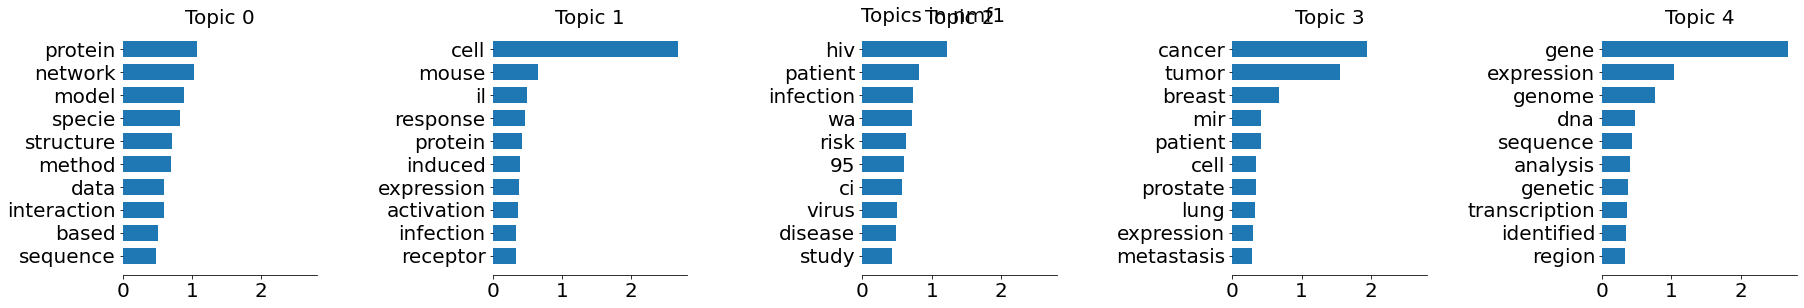

In [21]:
plot_top_words(
    nmf1, tfidf_vect.get_feature_names_out(), n_topics, n_top_words,"Topics in nmf1"
)

In [22]:
X_new = nmf1.transform(tfidf)
# Get the top predicted topic
predicted_topics = [np.argsort(each)[::-1][0] for each in X_new]

In [24]:
tempdf["topic"] = predicted_topics

/home/ec2-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
topicDict = {}

for i,topic in enumerate(nmf1.components_):
    topicDict[i] = [tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-1:]][0]
    
print(topicDict)

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{0: 'protein', 1: 'cell', 2: 'hiv', 3: 'cancer', 4: 'gene'}


In [26]:
with open(r'files/topicDict.pkl', 'wb') as f:
    pickle.dump(topicDict, f)
    
log(f'saving main word of topic to files/topicDict.pkl')

In [27]:
tempdf.to_csv(r'files/topics.txt', sep='\t', index = False)
log(f'Ran select_files.ipynb succesfully')